**NIM : 211351102**<br>
**Nama : Nisa Apriliana**<br>
**Kelas : Pagi A**

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nisaapriliana","key":"1824533cf00a7268fc8ac557a0edc0ad"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d cpluzshrijayan/milkquality

Dataset URL: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality
License(s): unknown
  0% 0.00/1.24k [00:00<?, ?B/s]
100% 1.24k/1.24k [00:00<00:00, 4.28MB/s]


In [4]:
!mkdir milkquality.zip
!unzip milkquality.zip -d milkquality
!ls milkquality

mkdir: cannot create directory ‘milkquality.zip’: File exists
Archive:  milkquality.zip
  inflating: milkquality/milknew.csv  
milknew.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

In [6]:
df = pd.read_csv('milkquality/milknew.csv')

In [7]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 66.3 KB


In [8]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [9]:
df.columns = df.columns.str.strip()

In [10]:
df.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1054     True
1055     True
1056     True
1057     True
1058     True
Length: 1059, dtype: bool

In [12]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="int64":
        numerical.append(col)
    elif df[col].dtype=="float64":
        numerical.append(col)
    else:
        catgcols.append(col)


for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [13]:
numerical

['pH', 'Temprature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']

In [14]:
catgcols

['Grade']

In [15]:
ind_col = [col for col in df.columns if col != 'Grade']
dep_col = 'Grade'

In [16]:
le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col].values)

In [17]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


In [18]:
X = df.drop(labels=['Grade'], axis=1).values
y = df['Grade']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [20]:
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=X.shape[-1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2691 (10.51 KB)
Trainable params: 2691 (10.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


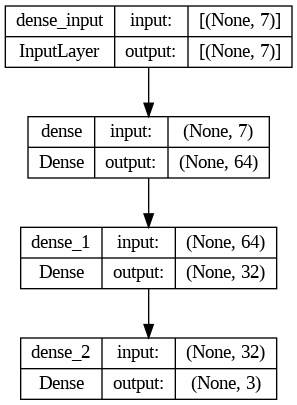

In [22]:
plot_model(model, show_shapes = True)

In [23]:
optim = Adam(lr=0.001)

model.compile(
    optimizer=optim,
    loss='sparse_categorical_crossentropy',
    metrics=['Accuracy']
    )

In [24]:
result = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=30,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)

Epoch 1/30
762/762 [==============================] - 4s 3ms/step - loss: 2.6012 - Accuracy: 0.4501 - val_loss: 1.6260 - val_Accuracy: 0.5647
Epoch 2/30
762/762 [==============================] - 2s 3ms/step - loss: 1.5336 - Accuracy: 0.5210 - val_loss: 1.2649 - val_Accuracy: 0.5059
Epoch 3/30
762/762 [==============================] - 2s 3ms/step - loss: 1.1981 - Accuracy: 0.5761 - val_loss: 2.2458 - val_Accuracy: 0.3647
Epoch 4/30
762/762 [==============================] - 3s 4ms/step - loss: 1.1796 - Accuracy: 0.6010 - val_loss: 1.4222 - val_Accuracy: 0.5176
Epoch 5/30
762/762 [==============================] - 2s 3ms/step - loss: 1.0831 - Accuracy: 0.5958 - val_loss: 0.9441 - val_Accuracy: 0.6941
Epoch 6/30
762/762 [==============================] - 3s 4ms/step - loss: 0.9205 - Accuracy: 0.6076 - val_loss: 0.8885 - val_Accuracy: 0.4941
Epoch 7/30
762/762 [==============================] - 3s 4ms/step - loss: 0.8862 - Accuracy: 0.6457 - val_loss: 0.6321 - val_Accuracy: 0.7412
Epoch 

In [25]:
pred = np.argmax(model.predict(X_test), axis=1)
print(accuracy_score(y_test, pred))

7/7 [==============================] - 0s 2ms/step
0.8443396226415094


In [26]:
prediction = model.predict([[6.6, 35, 1, 0, 1, 0, 254]])

predicted_class = np.argmax(prediction, axis=-1)

if predicted_class == 0:
  print("High")
elif predicted_class == 1:
  print("Low")
elif predicted_class == 2:
  print("Medium")

1/1 [==============================] - 0s 29ms/step
High


In [27]:
prediction = model.predict([[8.5, 70, 1, 1, 1, 1, 246]])

predicted_class = np.argmax(prediction, axis=-1)

if predicted_class == 0:
  print("High")
elif predicted_class == 1:
  print("Low")
elif predicted_class == 2:
  print("Medium")

1/1 [==============================] - 0s 30ms/step
Low


In [28]:
prediction = model.predict([[6.6, 37, 0, 0, 0, 0, 255]])

predicted_class = np.argmax(prediction, axis=-1)

if predicted_class == 0:
  print("High")
elif predicted_class == 1:
  print("Low")
elif predicted_class == 2:
  print("Medium")

1/1 [==============================] - 0s 35ms/step
Medium


In [29]:
model.save('./milkquality.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
model = tf.keras.models.load_model('./milkquality.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./milkquality.tflite", "wb").write(tflite_model)

6816